In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
testdata = pd.read_csv(r'C:\Users\Felipe\Documents\Uni\Master\Thesis\TestData.csv', delimiter = ";")
testdata.set_index('Process Number')
testdata = testdata.iloc[:,0:5]
print(testdata)

    Process Number  Generation     Status  Worker #  Duration (ms)
0                1           1   Accepted         6            300
1                2           1   Rejected         2            200
2                3           1   Accepted         3            500
3                4           1   Accepted         4             50
4                5           1   Accepted         5            100
5                6           1   Accepted         1            200
6                7           1   Rejected         7            100
7                8           1   Accepted         8             80
8                9           1   Rejected         4             50
9               10           1   Accepted         4             70
10              11           1   Accepted         4            100
11              12           1   Accepted         4             80
12              13           1   Accepted         2            200
13              14           1   Rejected         5           

In [3]:
workers = testdata['Worker #'].max()
walltimes = np.zeros(workers)
processes =np.zeros(workers)
for i in range(0, workers):
        testdata_worker = testdata.loc[testdata['Worker #']==i+1]
        testdata_worker = testdata_worker.assign(
            Walltime=lambda testdata_worker: testdata_worker['Duration (ms)'].cumsum())
        walltimes[i] = testdata_worker['Walltime'].tail(1)
        processes[i] = len(testdata_worker)
print(processes)
print(walltimes)

[10.  5.  5.  8.  9.  6.  9.  8.]
[1115.  764.  789.  678. 1014.  873.  855.  617.]


In [4]:
workers = int(testdata['Worker #'].max())
generations = int(testdata['Generation'].max())
max_proc = int(processes.max())

In [5]:
runtimes_wp = np.zeros((int(max_proc),workers))
generations_wp = np.zeros((int(max_proc),workers))
acceptance_wp = [[None for x in range(workers)] for y in range(int(max_proc))]

for i in range(0,workers):
    testdata_worker = testdata.loc[testdata['Worker #']==i+1]
    runtimes = testdata_worker['Duration (ms)'].values
    generations = testdata_worker['Generation'].values
    acceptance = testdata_worker['Status'].array
    for j in range(len(runtimes)):
        runtimes_wp[j,i]=runtimes[j]
        generations_wp[j,i]=generations[j]
        acceptance_wp[j][i] = acceptance[j]
    
print(runtimes_wp)
print(generations_wp)
print(acceptance_wp)

[[200. 200. 500.  50. 100. 300. 100.  80.]
 [ 50. 200. 106.  50. 150.  50.  50. 100.]
 [ 75.  52. 119.  70. 100. 100. 100.  70.]
 [100. 196.  50. 100.  80. 196.  50. 100.]
 [ 83. 116.  14.  80. 173. 102.  75.  50.]
 [130.   0.   0. 150.  63. 125. 151.  42.]
 [ 54.   0.   0. 159. 169.   0.  75.  32.]
 [152.   0.   0.  19. 137.   0. 199. 143.]
 [170.   0.   0.   0.  42.   0.  55.   0.]
 [101.   0.   0.   0.   0.   0.   0.   0.]]
[[1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 2. 1. 1. 1. 1. 1.]
 [1. 2. 2. 1. 1. 1. 1. 1.]
 [1. 2. 2. 1. 1. 2. 1. 1.]
 [2. 2. 2. 1. 2. 2. 1. 1.]
 [2. 0. 0. 1. 2. 2. 2. 2.]
 [2. 0. 0. 2. 2. 0. 2. 2.]
 [2. 0. 0. 2. 2. 0. 2. 2.]
 [2. 0. 0. 0. 2. 0. 2. 0.]
 [2. 0. 0. 0. 0. 0. 0. 0.]]
[['Accepted', 'Rejected', 'Accepted', 'Accepted', 'Accepted', 'Accepted', 'Rejected', 'Accepted'], ['Accepted', 'Accepted', 'Accepted', 'Rejected', 'Rejected', 'Accepted', 'Accepted', 'Accepted'], ['Accepted', 'Accepted', 'Rejected', 'Accepted', 'Accepted', 'Discarded', 'Accepted', 'Rejected'], ['

In [6]:
import matplotlib.colors as mcolor

color={'0None': 'white',
     '1Accepted': 'limegreen',
     '1Rejected': 'orangered',
     '1Discarded': 'darkgreen',
     '2Accepted': 'dodgerblue',
     '2Rejected': 'crimson',
     '2Discarded': 'darkblue',
     '3Accepted': 'turquiose',
     '3Rejected': 'red',
     '3Discarded': 'teal'}
print(color['1Accepted'])

limegreen


In [7]:
colortable = [[None for x in range(workers)] for y in range(int(max_proc))]

for i in range(workers):
    for j in range(int(max_proc)):
        colortable[j][i]=color[str(int(generations_wp[j,i]))+str(acceptance_wp[j][i])]


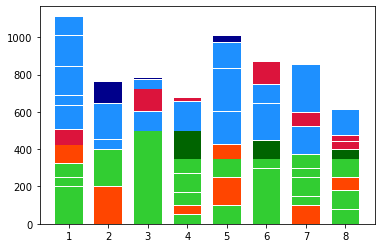

In [8]:
index = np.arange(workers)+1
bar_width = 0.7
y_offset = np.zeros(workers)

for row in range(int(max_proc)):
    plt.bar(index, runtimes_wp[row]-5, bar_width, bottom=y_offset, color = colortable[row])
    y_offset = y_offset + runtimes_wp[row]
    
    
plt.show()